In [5]:
from tensorflow.keras.datasets import imdb

max_features = 10000 #해당 데이터셋에서 빈도수 기준 상위 10000개 단어만 사용
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [10]:
len(x_train[0])

218

In [7]:
x_train.shape

(25000,)

In [12]:
from tensorflow.keras.preprocessing import sequence

max_len = 500 # 문서의 길이 500으로 통일

# 최대 길이로 패딩 진행
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [13]:
x_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [14]:
len(x_train[0])

500

In [15]:
print(x_train.shape)

(25000, 500)


In [16]:
print(y_train.shape)

(25000,)


In [17]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [18]:
# y 관련 원 핫 인코딩
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

y_train_one_hot

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

# CNN
## 텍스트 데이터를 분석하더라도 기본적으로 3차원 형태로 표현해야 한다.
## (n, m, c) 형태로 표현
### n = 문서의 길이를 의미함. 즉, 문서를 구성하는 최대 단어 수
### m = 한 단어를 표현하는 임베딩 벡터의 차원 (각 벡터가 가지고 있는 벡터 차원을 의미함)
### c = 이미지 데이터에서 채널 수, 텍스트 데이터는 1

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

#모델 구축
model = Sequential() # 레이어를 선형으로 쌓는 데 사용

model.add(layers.Embedding(max_features, 128, input_length=max_len)) # 텍스트 데이터를 임베딩 벡터로

# 1차원 합성곱 레이어를 추가하는 부분입니다. 이 레이어는 입력 시퀀스의 지역적 패턴을 캡처하는 데 도움이 됩니다. 레이어에는 32개의 필터, 7의 커널 크기, ReLU 활성화 함수가 사용됩니다.
model.add(layers.Conv1D(32, 7, activation='relu')) # 필터수 : 32 / 필터 세로 : 7 / 가로는 128로 고정

# 텍스트 분석에서는 필터가 위아래로만 움직이기 때문에, Conv1D 클래스 사용함. 입력 볼륨의 공간 차원을 다운 샘플링하는 데 사용됨
model.add(layers.MaxPool1D(5))  # 5: 풀링 필터의 세로의 길이 / 가로 길이는 1로 고정임 / stride는 자동으로 5로 고정됨

model.add(layers.Flatten())

model.add(layers.Dense(32, activation='relu')) # 32차원으로 축소

model.add(layers.Dense(2, activation='softmax')) # 출력 레이어: 2개의 뉴런이 있고 (이진 분류인 경우), softmax 활성화 함수를 사용하여 각 클래스에 대한 확률을 얻음.

model.summary() # 모델의 요약을 출력

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1  (None, 98, 32)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 32)                100384    
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                        

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop


model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc']) # 분류 문제이기 때문에 크로스 엔트로피로 설정하고, RMSprop 옵티마이저를 사용한다.

history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 80s 504ms/step - loss: 0.6468 - acc: 0.5972 - val_loss: 0.4381 - val_acc: 0.8106
Epoch 2/10
157/157 [==============================] - 76s 481ms/step - loss: 0.3533 - acc: 0.8470 - val_loss: 0.4553 - val_acc: 0.8060
Epoch 3/10
157/157 [==============================] - 67s 426ms/step - loss: 0.2466 - acc: 0.9036 - val_loss: 0.2786 - val_acc: 0.8864
Epoch 4/10
157/157 [==============================] - 65s 412ms/step - loss: 0.1889 - acc: 0.9264 - val_loss: 0.2991 - val_acc: 0.8820
Epoch 5/10
157/157 [==============================] - 68s 434ms/step - loss: 0.1465 - acc: 0.9460 - val_loss: 0.5011 - val_acc: 0.8240
Epoch 6/10
157/157 [==============================] - 68s 435ms/step - loss: 0.1082 - acc: 0.9617 - val_loss: 0.3473 - val_acc: 0.8772
Epoch 7/10
157/157 [==============================] - 64s 411ms/step - loss: 0.0730 - acc: 0.9765 - val_loss: 0.4210 - val_acc: 0.8714
Epoch 8/10
157/157 [==============================] - 6

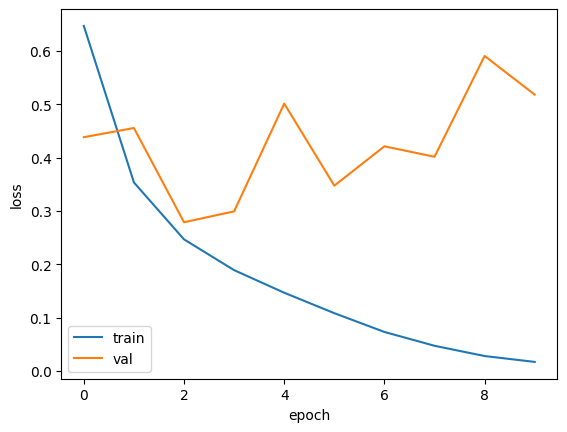

782/782 [==============================] - 21s 27ms/step - loss: 0.5624 - acc: 0.8721


0.8721200227737427

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

test_acc